In [1]:
# imports we need to use.
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import math

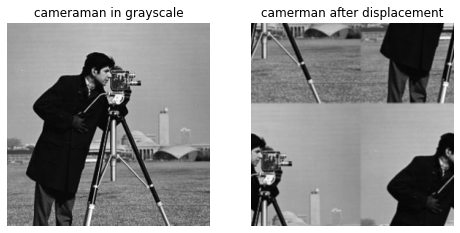

<Figure size 576x360 with 0 Axes>

In [2]:
# Section 4.a.


def bilinear_displacement (dx,dy,image):
    [width,hight]=image.shape
    vecA=[1-dx,dx] #row vec.
    vecB=[[1-dy]
          ,[dy]] #vecB is an column vector

    padding_image=np.pad(image,(1,1),'wrap') #padding py 0 for cyclic displacement.
    displaced_image=np.zeros((image.shape))
    
    for i in range(width):
        padding_image[i,hight]=image[i,0] #implement cyclic displacement.
        
    for j in range(hight):
        padding_image[width,j]=image[0,j] #implement cyclic displacement.
    temp=padding_image # for not save the content of the displaced image.
    
    for i in range(width):
        for j in range(hight):
            matrix_temp=[[padding_image[i,j],padding_image[i,j+1]],
                         [padding_image[i+1,j],padding_image[i+1,j+1]]]
            tp=np.matmul(vecA,matrix_temp) #temp array for using in multipy.
            displaced_image[i,j]=np.matmul(tp,vecB)
    return displaced_image
    
    
    
# Section 4.b.
def genral_displacement(dx, dy, image):
    dx_frac=dx%1 # taking the fraction component of dx.
    dx_int=math.floor(dx) # taking the integer component of dx.
    dy_frac=dy%1 # taking the fraction component of dy.
    dy_int=math.floor(dy) # taking the integer component of dx.
    
    [row,col]=image.shape
    
    shift_image=np.zeros((image.shape))
    displaced_image=np.zeros((image.shape)) # the image we want to return.
    sp_image=bilinear_displacement(dx_frac,dy_frac,image)
    
    for i in range(row-dx_int):
        for j in range(col):
            shift_image[j,i+dx_int]=sp_image[j,i]
    
    for i in range(dx_int):
        for j in range(col):
            shift_image[j,i]=sp_image[j,row-dx_int+i]
    
    for i in range(row):
        for j in range(col-dy_int):
            displaced_image[j+dy_int,i]=shift_image[j,i]
    
    for i in range(row):
        for j in range(dy_int):
            displaced_image[j,i]=shift_image[col-dy_int+j,i]
    
    
    return displaced_image
    

#section 4.c. the cameraman.

cameraman_image = cv2.imread(os.path.join(".","../given_data","cameraman.jpg"))
image_width=cameraman_image.shape
#convert the image to gray scale mode.

cameraman_grayscale = cv2.cvtColor(cameraman_image,cv2.COLOR_BGR2GRAY)

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 2 ,1) # create a subplot of certain size
ax.imshow(cameraman_grayscale, cmap='gray')
ax.set_title("cameraman in grayscale")
ax.set_axis_off()

new_image=genral_displacement(150.7,110.4,cameraman_grayscale)

fig1 = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 2 ,2) # create a subplot of certain size
ax.imshow(new_image, cmap='gray')
ax.set_title("camerman after displacement")
ax.set_axis_off()
                
#displaced_image=bilinear_displacement(150.7,110.4,cameraman_grayscale)
                
    



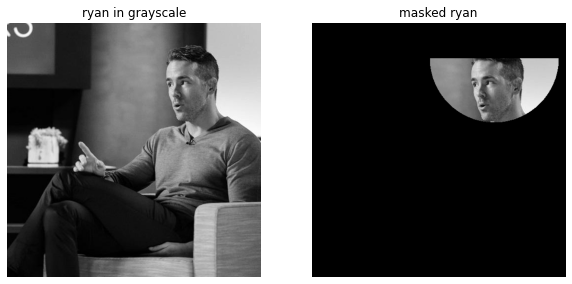

In [3]:
#Question 4 - part d 
#%matplotlib notebook

ryan_image = cv2.imread(os.path.join(".","../given_data","ryan.jpg"))

# convert the image to gray scale mode.
ryan_grayscale = cv2.cvtColor(ryan_image,cv2.COLOR_BGR2GRAY)
# display images
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(1, 2 ,1) # create a subplot of certain size
ax.imshow(ryan_grayscale, cmap='gray')
ax.set_title("ryan in grayscale")
ax.set_axis_off()

#data points
top_head_x,top_head_y = (367,70)  # (368,45)
bottom_head_x,bottom_head_y = (347,200) 
right_head_x,right_head_y = (422,104) 
left_head_x,left_head_y = (320,117) 
#building mask
n,m = ryan_grayscale.shape
mask1 =  np.zeros(ryan_grayscale.shape, dtype='uint8')
new1 = ryan_grayscale.copy()

# calculating center of circle and radius by averaging
center_x = top_head_y #n- round((left_head_x+right_head_x)/2)
center_y = top_head_x
radius_horozintal = right_head_x - left_head_x
radius_vertical = bottom_head_y - top_head_y
r = max(radius_horozintal,radius_vertical)

#create an open grid for our image
x,y = np.ogrid[0:n, 0:m]
#add half circal conditions
circle_mask = np.logical_and((x-center_x) **2 + (y-center_y) **2  < r**2 , x > center_x)
#update mask to be half circal = 1
mask1[circle_mask] = 1
# Mask input image with binary mask
ryan_win = ryan_grayscale * mask1
ax = fig.add_subplot(1, 2 ,2) # create a subplot of certain size
ax.imshow(ryan_win, cmap='gray')
ax.set_title("masked ryan")
ax.set_axis_off()

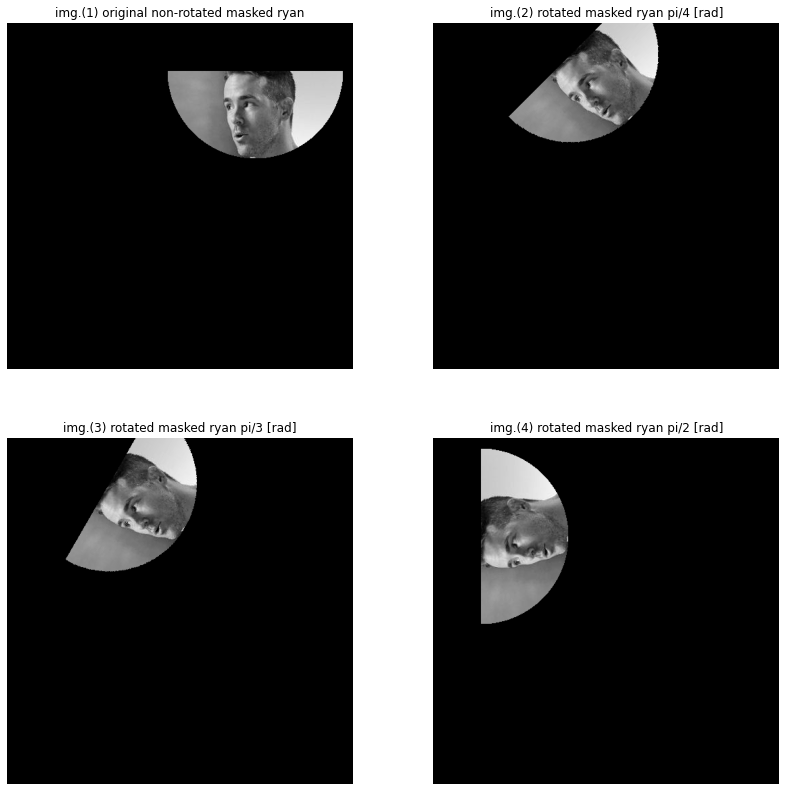

In [4]:
#Question 4 - part e
def rotating_img(image, theta):
#  Calculate the displacement of a pixel using a bilinear interpolation.
#  :param image: the image to rotate.
#  :param theta: Angle of rotation in radians.
#  :return:
#  rotated_image: The new displaced image
 # ====== YOUR CODE: ======
    
    rotated_image = np.zeros(image.shape, dtype='uint8')
    #  center of image 
    h,w = rotated_image.shape

    center_y = h//2
    center_x = w//2

    for i in range(h):
        for j in range(w):
            #calculate new  rotated pixels in relation to (0,0)
            x= (i-center_x)*math.cos(theta)+(j-center_y)*math.sin(theta)
            y= (i-center_x)*-math.sin(theta)+(j-center_y)*math.cos(theta)
            #calculate new  rotated pixels in relation to (center_x,center_y)
            x = round(x) + center_x 
            y = round(y) + center_y 
                
            if ( 0<=x<h and 0<=y<w):
                rotated_image[i,j] = image[x,y]

    
 # ========================
    return rotated_image

# Use function on ryan_win
pi_4 = math.pi/4
pi_3 = math.pi/3
pi_2 = math.pi/2
rotated_pi_4 = rotating_img(ryan_win , pi_4)
rotated_pi_3 = rotating_img(ryan_win , pi_3)
rotated_pi_2 = rotating_img(ryan_win , pi_2)

fig = plt.figure(figsize=(14, 14))
ax = fig.add_subplot(2, 2 ,1) # create a subplot of certain size
ax.imshow(ryan_win, cmap='gray')
ax.set_title("img.(1) original non-rotated masked ryan")
ax.set_axis_off()
ax = fig.add_subplot(2, 2 ,2) # create a subplot of certain size
ax.imshow(rotated_pi_4, cmap='gray')
ax.set_title("img.(2) rotated masked ryan pi/4 [rad]")
ax.set_axis_off()
ax = fig.add_subplot(2, 2 ,3) # create a subplot of certain size
ax.imshow(rotated_pi_3, cmap='gray')
ax.set_title("img.(3) rotated masked ryan pi/3 [rad]")
ax.set_axis_off()
ax = fig.add_subplot(2, 2 ,4) # create a subplot of certain size
ax.imshow(rotated_pi_2, cmap='gray')
ax.set_title("img.(4) rotated masked ryan pi/2 [rad]")
ax.set_axis_off()